### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura (X) y la edad (y) de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [136]:
lista_edad_altura = [("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82),("Pablo Martínez",28,1.81),("Javier Araiz Miranda", 30, 1.80)]

In [137]:
altura = []
edad = []
for a in range(len(lista_edad_altura)):
    altura.append(lista_edad_altura[a][2])
    edad.append(lista_edad_altura[a][1])
    

In [138]:
X = np.array(altura)
y = np.array(edad)

In [139]:
X = X.reshape(-1, 1)

In [140]:
X

array([[1.87],
       [1.78],
       [1.6 ],
       [1.79],
       [1.86],
       [1.54],
       [1.61],
       [1.52],
       [1.77],
       [1.7 ],
       [1.78],
       [1.63],
       [1.73],
       [1.85],
       [1.78],
       [1.7 ],
       [1.64],
       [1.82],
       [1.81],
       [1.8 ]])

In [141]:
# Partimos en conjuntos "train" y "test".

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (16, 1)
X_test: (4, 1)
y_train: (16,)
y_test: (4,)


In [143]:
model_edad_altura = LinearRegression()

In [144]:
model_edad_altura.fit(X_train, y_train)

LinearRegression()

In [145]:
print("Secante:", model_edad_altura.intercept_)
print("Pendiente:", model_edad_altura.coef_)

Secante: 34.632714430574545
Pendiente: [-0.98954509]


In [146]:
predict = model_edad_altura.predict(X)

In [147]:
model_edad_altura.score(X_train, y_train) * 100

0.013290364016149692

In [148]:
model_edad_altura.score(X_test, y_test) *100

-21.347709530915672

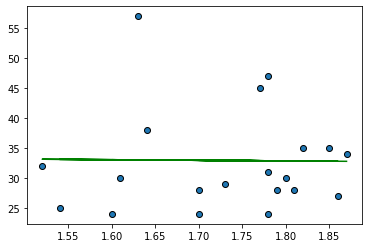

In [149]:
plt.scatter(X, y, edgecolors= 'black')
plt.plot(X, predict, c = 'g')

### La regresión lineal no es una buena técnica para este tipo de problemas ya que, por encima de una determinada edad, deja de existir relación entre altura y edad.


In [150]:
predict

array([32.78226511, 32.87132417, 33.04944229, 32.86142872, 32.79216057,
       33.10881499, 33.03954684, 33.1286059 , 32.88121962, 32.95048778,
       32.87132417, 33.01975594, 32.92080143, 32.80205602, 32.87132417,
       32.95048778, 33.00986048, 32.83174237, 32.84163782, 32.85153327])

In [154]:
y

array([34, 31, 24, 28, 27, 25, 30, 32, 45, 28, 24, 57, 29, 35, 47, 24, 38,
       35, 28, 30])

In [155]:
for i, (real, prediccion) in enumerate(zip(y, predict)):
    print('posición ' + str(i) + ': ' + str(real - prediccion))

posición 0: 1.2177348858351706
posición 1: -1.8713241721738498
posición 2: -9.049442288191898
posición 3: -4.861428721283957
posición 4: -5.792160565054722
posición 5: -8.108814993531247
posición 6: -3.039546837302005
posición 7: -1.1286058953110327
posición 8: 12.118780376936257
posición 9: -4.950487779292985
posición 10: -8.87132417217385
posición 11: 23.980244064477773
posición 12: -3.9208014266233064
posición 13: 2.197943984055385
posición 14: 14.12867582782615
posición 15: -8.950487779292985
posición 16: 4.990139515367666
posición 17: 2.168257631385714
posición 18: -4.841637819504179
posición 19: -2.8515332703940715


In [156]:
print('MSE:', mean_squared_error(y_test, model_edad_altura.predict(X_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, model_edad_altura.predict(X_test))))

MSE: 22.449326263219398
RMSE: 4.738071998526341


El mejor para este problema es el RMSE, el cual representa de la manera más acertada el error cometido.

In [108]:
lista_edad_altura

[('Daniel Walker', 34, 1.87),
 ('Leonardo Frazzetto', 31, 1.78),
 ('Xinru Yang', 24, 1.6),
 ('Jorge Garcia', 28, 1.79),
 ('Jonathan Suárez', 27, 1.86),
 ('Marina Serrano', 25, 1.54),
 ('Karina Inche', 30, 1.61),
 ('Mary Meza', 32, 1.52),
 ('Mauro Garcia-Oliva', 45, 1.77),
 ('José Carlos Batista', 28, 1.7),
 ('Isabel Palomares', 24, 1.78),
 ('Gina Garrido', 57, 1.63),
 ('Sonia Cobo', 29, 1.73),
 ('Miguel Barquero', 35, 1.85),
 ('Nacho Astorga', 47, 1.78),
 ('Adrià Gallardo', 24, 1.7),
 ('Juan Bayon', 38, 1.64),
 ('Nacho Fontal', 35, 1.82),
 ('Pablo Martínez', 28, 1.81),
 ('Javier Araiz Miranda', 30, 1.8)]

In [109]:
lista_edades = []
lista_alturas = []
for i in lista_edad_altura:
    lista_edades.append(i[1])
    lista_alturas.append(i[2])
print(lista_edades)
print(lista_alturas)

[34, 31, 24, 28, 27, 25, 30, 32, 45, 28, 24, 57, 29, 35, 47, 24, 38, 35, 28, 30]
[1.87, 1.78, 1.6, 1.79, 1.86, 1.54, 1.61, 1.52, 1.77, 1.7, 1.78, 1.63, 1.73, 1.85, 1.78, 1.7, 1.64, 1.82, 1.81, 1.8]


In [110]:
df_edad_altura = pd.DataFrame(list(zip(lista_alturas, lista_edades)), columns= ['Altura', 'Edad'])
df_edad_altura

,Altura,Edad
0,1.87,34
1,1.78,31
2,1.60,24
3,1.79,28
4,1.86,27
5,1.54,25
6,1.61,30
7,1.52,32
8,1.77,45
9,1.70,28


In [111]:
df_edad_altura

,Altura,Edad
0,1.87,34
1,1.78,31
2,1.60,24
3,1.79,28
4,1.86,27
5,1.54,25
6,1.61,30
7,1.52,32
8,1.77,45
9,1.70,28


<AxesSubplot:>

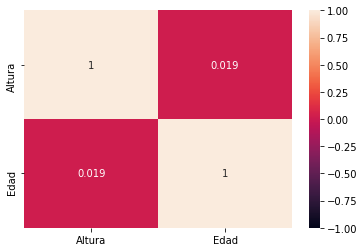

In [112]:
#lista_edad_altura = np.array(lista_edad_altura)
sns.heatmap(df_edad_altura.corr(),
           vmin = -1,
           vmax = 1,
           annot = True)

Se puede ver que la altura y la edad no se correlacionan entre sí para éste conjunto de datos.

## Qué pasa al multiplicar la altura por 2 ?

In [113]:
altura_x_2 = df_edad_altura['Altura']*2

In [114]:
altura_x_2

0     3.74
1     3.56
2     3.20
3     3.58
4     3.72
5     3.08
6     3.22
7     3.04
8     3.54
9     3.40
10    3.56
11    3.26
12    3.46
13    3.70
14    3.56
15    3.40
16    3.28
17    3.64
18    3.62
19    3.60
Name: Altura, dtype: float64

In [115]:
X_altura_x_2 = np.array(altura_x_2)
print(X_altura_x_2)
print(y)

[3.74 3.56 3.2  3.58 3.72 3.08 3.22 3.04 3.54 3.4  3.56 3.26 3.46 3.7
 3.56 3.4  3.28 3.64 3.62 3.6 ]
[34 31 24 28 27 25 30 32 45 28 24 57 29 35 47 24 38 35 28 30]


In [116]:
X_altura_x_2 = X_altura_x_2.reshape(-1, 1)

In [117]:
X_train_altura_x_2, X_test_altura_x_2, y_train_altura_x_2, y_test_altura_x_2 = train_test_split(X_altura_x_2, y, test_size=0.2)

In [118]:
model_altura_x_2 = LinearRegression()
model_altura_x_2.fit(X_train_altura_x_2, y_train_altura_x_2)

LinearRegression()

In [119]:
predict_altura_x_2 = model_altura_x_2.predict(X_test_altura_x_2)

In [120]:
model_altura_x_2.score(X_train_altura_x_2, y_train_altura_x_2) * 100

0.0364364955694807

In [121]:
model_altura_x_2.score(X_test_altura_x_2, y_test_altura_x_2) * 100

-1621.401393025691

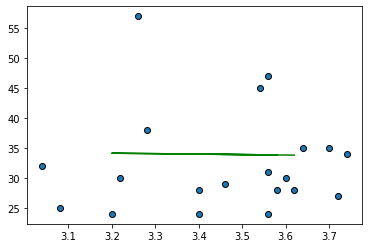

In [122]:
plt.scatter(X_altura_x_2, y, edgecolors= 'black')
plt.plot(X_test_altura_x_2, predict_altura_x_2, c = 'g')

El modelo continúa siendo ineficiente

## Qué pasa al multiplicar la edad por 2 ?

In [123]:
X_edad_x_2 = df_edad_altura['Altura']
y_edad_x_2 = df_edad_altura['Edad']*2

In [124]:
X_edad_x_2 = np.array(X_edad_x_2).reshape(-1, 1)

In [125]:
X_train_edad_x_2, X_test_edad_x_2, y_train_edad_x_2, y_test_edad_x_2 = train_test_split(X_edad_x_2, y_edad_x_2, test_size=0.2)

In [126]:
model_edad_x_2 = LinearRegression()
model_edad_x_2.fit(X_train_edad_x_2, y_train_edad_x_2)

LinearRegression()

In [127]:
predict_edad_x_2 = model_edad_x_2.predict(X_test_edad_x_2)

In [128]:
model_edad_x_2.score(X_train_edad_x_2, y_train_edad_x_2) * 100

0.1009472995873173

In [129]:
model_edad_x_2.score(X_test_edad_x_2, y_test_edad_x_2) * 100

-2.373264244770179

In [130]:
predict_edad_x_2

array([64.32713942, 65.33120081, 65.66588793, 64.49448298])

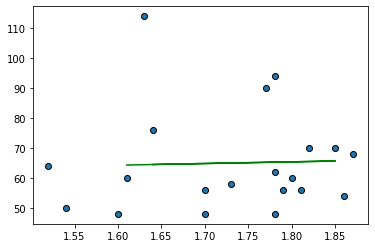

In [131]:
plt.scatter(X_edad_x_2, y_edad_x_2, edgecolors= 'black')
plt.plot(X_test_edad_x_2, predict_edad_x_2, c = 'g')

Nuevamente, se observa que los resultados no son representativos ya que no se presenta una relación entre los datos.